## Calculating overall immunization rates 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
study_results_path = "data/totalavgfilter.csv"

# Read the data and the study results
study_results = pd.read_csv(study_results_path)

# Display the data table for preview
study_results.head()

,Country,GDP,Per Capita,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Urban population,Rural population,"Population, female (percent of total)",Medical doctors (number),Life expectancy total population
0,Afghanistan,1.857138e+10,512.909526,65.8,65.8,63.8,0.450889,45.802640,25.2644,74.7356,49.429954,9500.4,64.149149
1,Albania,1.336488e+10,4658.240106,98.8,98.8,95.6,3.052308,98.493376,59.3572,40.6428,49.884581,4826.0,78.355262
2,Algeria,1.685577e+11,4073.145408,91.8,91.8,87.4,1.820000,86.449686,72.0354,27.9646,49.045001,73456.5,76.491339
3,Angola,1.060423e+11,3573.626620,58.8,54.8,47.8,0.800000,49.678755,64.8250,35.1750,50.627161,6496.5,60.446212
4,Antigua and Barbuda,1.506947e+09,15784.778096,95.2,96.0,93.4,2.934250,86.711731,24.7328,75.2672,52.309463,264.0,76.772637


In [2]:
study_results.dtypes

Country                                   object
GDP                                      float64
Per Capita                               float64
DPT Immunization                         float64
HepB3 Immunization                       float64
Measles Immunization                     float64
Hospital beds                            float64
Basic sanitation services                float64
Urban population                         float64
Rural population                         float64
Population, female (percent of total)    float64
Medical doctors (number)                 float64
Life expectancy total population         float64
dtype: object

In [3]:

# Create a list of column we want to analyze

columns_to_analyze = ['Country', 'DPT Immunization', 'HepB3 Immunization', 'Measles Immunization', 'Medical doctors (number)', 'Life expectancy total population']

# Extract the specified columns into a new DataFrame
immunization_df = study_results[columns_to_analyze]

# Print the new DataFrame
immunization_df.head()


,Country,DPT Immunization,HepB3 Immunization,Measles Immunization,Medical doctors (number),Life expectancy total population
0,Afghanistan,65.8,65.8,63.8,9500.4,64.149149
1,Albania,98.8,98.8,95.6,4826.0,78.355262
2,Algeria,91.8,91.8,87.4,73456.5,76.491339
3,Angola,58.8,54.8,47.8,6496.5,60.446212
4,Antigua and Barbuda,95.2,96.0,93.4,264.0,76.772637


In [4]:
#immunization_df['Average Immunization'] 
immunization_df['Average Immunization'] = immunization_df[['DPT Immunization', 'HepB3 Immunization', 'Measles Immunization']].mean(axis=1)
immunization_df.head()


C:\Users\Julia\AppData\Local\Temp\ipykernel_23212\3237623394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immunization_df['Average Immunization'] = immunization_df[['DPT Immunization', 'HepB3 Immunization', 'Measles Immunization']].mean(axis=1)


,Country,DPT Immunization,HepB3 Immunization,Measles Immunization,Medical doctors (number),Life expectancy total population,Average Immunization
0,Afghanistan,65.8,65.8,63.8,9500.4,64.149149,65.133333
1,Albania,98.8,98.8,95.6,4826.0,78.355262,97.733333
2,Algeria,91.8,91.8,87.4,73456.5,76.491339,90.333333
3,Angola,58.8,54.8,47.8,6496.5,60.446212,53.800000
4,Antigua and Barbuda,95.2,96.0,93.4,264.0,76.772637,94.866667


## Sort the values to determine the highest vaccine rate countries, and the lowest vaccine rate countries

In [5]:
#Plot the top 10 countries with the average highest vaccination percentage to life expectancy, to medical doctors (numbers)
sortedtop_df = immunization_df.sort_values(by=['Average Immunization', 'Life expectancy total population', 'Medical doctors (number)'], ascending=False)
sortedtop_df.head(10)

,Country,DPT Immunization,HepB3 Immunization,Measles Immunization,Medical doctors (number),Life expectancy total population,Average Immunization
36,Cuba,99.0,99.0,99.0,9.191700e+04,78.688988,99.000000
86,Maldives,99.0,99.0,99.0,9.463333e+02,78.296209,99.000000
106,Oman,99.0,99.0,99.0,9.188800e+03,77.140038,99.000000
132,Sri Lanka,99.0,99.0,99.0,2.046300e+04,76.723398,99.000000
31,China,99.0,99.0,99.0,2.841939e+06,76.494664,99.000000
94,Morocco,99.0,99.0,99.0,2.600300e+04,76.177171,99.000000
145,United Arab Emirates,98.6,98.6,99.0,2.310840e+04,77.560149,98.733333
10,Bahrain,98.4,98.6,99.0,1.270000e+03,76.921916,98.666667
92,Mongolia,98.8,98.8,98.4,1.020100e+04,69.638747,98.666667
21,Brunei Darussalam,99.0,99.0,97.4,7.110000e+02,75.594092,98.466667


In [6]:
#Plot the 10 countries with the average lowest vaccination percentage to life expectancy, to medical doctors (numbers)
sortedbottom_df = immunization_df.sort_values(by=['Average Immunization', 'Life expectancy total population', 'Medical doctors (number)'], ascending=True)

sortedbottom_df.head(10)

,Country,DPT Immunization,HepB3 Immunization,Measles Immunization,Medical doctors (number),Life expectancy total population,Average Immunization
109,Papua New Guinea,40.2,40.8,43.0,591.000000,63.995336,41.333333
29,Chad,44.0,44.0,40.6,709.800000,53.706891,42.866667
57,Guinea,47.0,46.6,47.0,1580.333333,60.552185,46.866667
130,South Sudan,47.2,44.2,50.4,411.000000,57.394850,47.266667
28,Central African Republic,47.0,47.0,49.0,329.500000,52.170470,47.666667
42,Equatorial Guinea,50.4,50.4,52.4,507.000000,58.089527,51.066667
137,Syrian Arab Republic,46.4,46.4,60.8,22485.000000,71.536174,51.200000
103,Nigeria,52.6,52.6,51.0,79054.000000,53.931194,52.066667
3,Angola,58.8,54.8,47.8,6496.500000,60.446212,53.800000
46,Ethiopia,67.2,66.6,57.0,8395.000000,65.854702,63.600000


## Sorted Values with just Life Expectancy 

In [7]:
#Focus on life expectancy and compare it to average immunization, and Medical Doctors
columns_to_analyze = ['Country','Life expectancy total population','Average Immunization', 'Medical doctors (number)']

# Extract the specified columns into a new DataFrame
life_df = immunization_df[columns_to_analyze]

#Change the name of the country column to match the mortality data for later analysis 

# Create a dictionary of column name changes
column_names = {'Country': 'Country Name'}

# Rename the columns using the dictionary
life_df = life_df.rename(columns=column_names)

#Add dataframe to csv 
# Specify the file path and name for the CSV file
csv_file_path = "./Data/life_df.csv"

# Convert the DataFrame to CSV
life_df.to_csv(csv_file_path, index=False)

# Print the new DataFrame
life_df.head(10)

,Country Name,Life expectancy total population,Average Immunization,Medical doctors (number)
0,Afghanistan,64.149149,65.133333,9500.4
1,Albania,78.355262,97.733333,4826.0
2,Algeria,76.491339,90.333333,73456.5
3,Angola,60.446212,53.800000,6496.5
4,Antigua and Barbuda,76.772637,94.866667,264.0
5,Argentina,76.357416,89.600000,175866.0
6,Armenia,74.951751,94.133333,10745.0
7,Australia,82.665681,94.600000,90220.0
8,Austria,81.690932,90.333333,45653.0
9,Azerbaijan,72.679237,96.133333,32166.0


In [8]:
#Plot the 10 countries with the highest life expectancy
sortedtop_life_df = life_df.sort_values(by=['Life expectancy total population'], ascending=False)

sortedtop_life_df.head(10)

,Country Name,Life expectancy total population,Average Immunization,Medical doctors (number)
71,Japan,84.247228,97.800000,311755.5
136,Switzerland,83.567678,86.533333,36183.6
131,Spain,83.391822,96.533333,186539.0
69,Italy,83.172241,92.866667,239300.4
126,Singapore,83.050048,95.733333,13371.4
49,France,82.731173,92.133333,209756.4
7,Australia,82.665681,94.600000,90220.0
105,Norway,82.626965,96.000000,24890.4
68,Israel,82.579647,96.800000,28893.6
63,Iceland,82.565586,88.169262,1329.6


In [9]:
#Plot the 10 countries with the lowest life expectancy
sortedbottom_life_df = life_df.sort_values(by=['Life expectancy total population'], ascending=True)

sortedbottom_life_df.head(10)

,Country Name,Life expectancy total population,Average Immunization,Medical doctors (number)
28,Central African Republic,52.170470,47.666667,329.500000
78,Lesotho,52.931118,87.666667,998.000000
29,Chad,53.706891,42.866667,709.800000
125,Sierra Leone,53.833848,87.933333,566.000000
103,Nigeria,53.931194,52.066667,79054.000000
130,South Sudan,57.394850,47.266667,411.000000
58,Guinea-Bissau,57.622945,86.733333,299.666667
42,Equatorial Guinea,58.089527,51.066667,507.000000
45,Eswatini,58.322454,88.866667,197.666667
87,Mali,58.421020,73.466667,2174.500000


## Scatter Plot Line Regression for Average Immunization and Life Expectancy of Total Population 

The Pearson Correlation Coefficient between Average Immunization and the Life Expectancy 0.58
The r-squared is: 0.33082715466992524


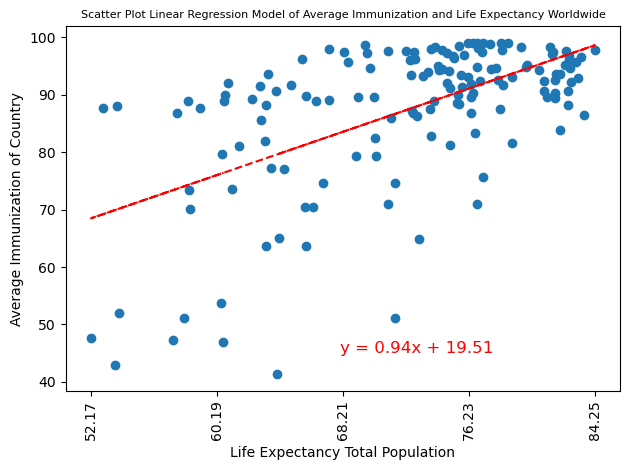

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for Average Immunization and Life Expectacy 

#Define the x and y values
x_values = immunization_df["Life expectancy total population"]
y_values = immunization_df["Average Immunization"]

correlation = st.pearsonr(x_values,y_values)
print(f"The Pearson Correlation Coefficient between Average Immunization and the Life Expectancy {round(correlation[0],2)}")

# Plot the different factors in a scatter plot
t_slope, t_int, t_r, t_p, t_std_err = st.linregress(
    x_values, y_values)
t_fit = t_slope * x_values + t_int
line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_int,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,t_fit,"--", color='r')
plt.xticks(x_values, rotation=90)
plt.annotate(line_eq,(68,45),fontsize=12,color="red")
plt.xlabel('Life Expectancy Total Population')
plt.ylabel('Average Immunization of Country')
plt.title('Scatter Plot Linear Regression Model of Average Immunization and Life Expectancy Worldwide', fontsize=8)

# Spread out the x-axis ticks
num_ticks = 5
x_ticks = np.linspace(min(x_values), max(x_values), num_ticks)
plt.xticks(x_ticks)


print(f"The r-squared is: {t_r**2}")
# Adjust the layout to accommodate the title
plt.tight_layout()
#Save the graph as an image 
plt.savefig('Images/immunization_to_life_scatter.png')

#Show the graph

plt.show()

# Analysis

Based on our analysis, there is a positive correlation between the average immunization rates per country and the life expectancy of the total population. The Pearson correlation coefficient, which measures the strength and direction of the linear relationship, is calculated to be 0.58. Additionally, the calculated r-squared value is 0.33, indicating that approximately 33% of the variability in life expectancy can be explained by average immunization rates.

The moderate correlation coefficient of 0.58 suggests a discernible relationship between average immunization rates and life expectancy. This indicates that countries with higher average immunization rates tend to have higher life expectancies, while countries with lower immunization rates may experience lower life expectancies.

However, it's important to note that correlation does not imply causation. While there is a positive correlation between these variables, other factors such as healthcare access, socioeconomic conditions, and overall public health initiatives may also influence life expectancy.

In conclusion, our analysis reveals a moderate positive correlation between average immunization rates per country and life expectancy of the total population. This suggests that higher immunization rates may contribute to increased life expectancy. Nonetheless, further research is needed to explore the specific mechanisms and potential confounding factors involved in this relationship.

The Pearson Correlation Coefficient between Average Immunization and the Medical doctors (number) 0.11
The r-squared is: 0.01283215593971585


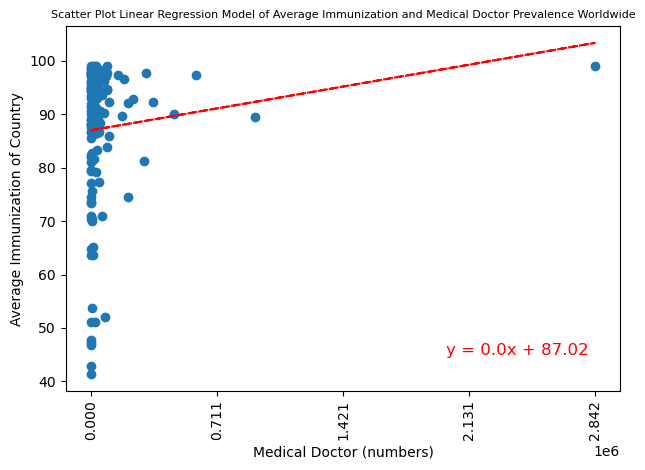

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for Average Immunization and Life Expectacy 

#Define the x and y values
x_values = immunization_df["Medical doctors (number)"]
y_values = immunization_df["Average Immunization"]

correlation = st.pearsonr(x_values,y_values)
print(f"The Pearson Correlation Coefficient between Average Immunization and the Medical doctors (number) {round(correlation[0],2)}")

# Plot the different factors in a scatter plot
t_slope, t_int, t_r, t_p, t_std_err = st.linregress(
    x_values, y_values)
t_fit = t_slope * x_values + t_int
line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_int,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,t_fit,"--", color='r')
plt.xticks(x_values, rotation=90)
plt.annotate(line_eq,(2e6,45),fontsize=12,color="red")
plt.xlabel('Medical Doctor (numbers)')
plt.ylabel('Average Immunization of Country')
plt.title('Scatter Plot Linear Regression Model of Average Immunization and Medical Doctor Prevalence Worldwide', fontsize=8)

# Spread out the x-axis ticks
num_ticks = 5
x_ticks = np.linspace(min(x_values), max(x_values), num_ticks)
plt.xticks(x_ticks)


print(f"The r-squared is: {t_r**2}")
# Adjust the layout to accommodate the title
plt.tight_layout()
#Save the graph as an image 
plt.savefig('Images/immunization_to_doctor_scatter.png')

#Show the graph
plt.show()

# Analysis

Based on our analysis, there appears to be a very weak correlation between the number of Medical Doctors and the Average Immunization rates per country. The Pearson correlation coefficient, which measures the strength and direction of the linear relationship, is 0.11. Additionally, the calculated r-value is 0.0128.

It is worth noting that there are some outliers within the data that may have an impact on the correlation analysis. These outliers could potentially skew the overall relationship between the number of Medical Doctors and Average Immunization rates.

When interpreting these findings, it's important to consider the limitations of the study. One limitation is the lack of information regarding the specific type of medical doctors included in the analysis. This could result in variations in the availability and expertise of medical professionals, which can affect immunization administration rates. Additionally, even if there is a higher prevalence of medical doctors in certain countries, the lack of hospitals or medical supplies may hinder their ability to effectively assist citizens.

Furthermore, the different healthcare systems across countries, such as privatized systems versus public systems, can also play a role in vaccination rates. These variations in healthcare systems introduce additional complexities that should be taken into account when assessing the relationship between Medical Doctors and Immunization rates.

To further analyze the data and address the impact of outliers, it is recommended to identify and evaluate the outliers individually. By excluding the outliers from the analysis, it may be possible to observe any changes in the correlation between Medical Doctors and Average Immunization rates.

In conclusion, while our analysis indicates a weak correlation between the number of Medical Doctors and Average Immunization rates, it is crucial to acknowledge the limitations associated with the type of doctors included, the presence of outliers, and the influence of different healthcare systems. Further research and analysis, including outlier identification and potentially excluding them, can provide a more comprehensive understanding of the relationship between Medical Doctors and Immunization rates.

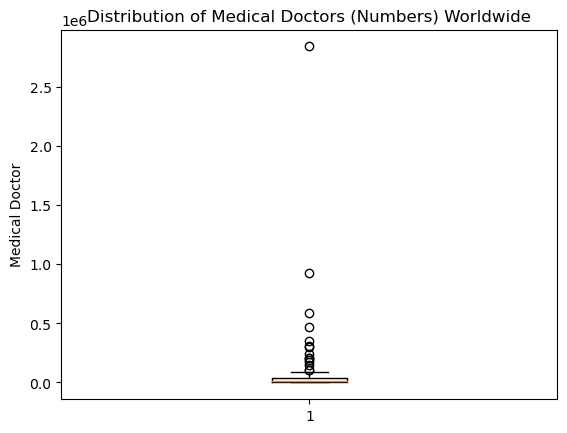

In [12]:
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Medical Doctors (Numbers) Worldwide')
ax1.set_ylabel('Medical Doctor')
ax1.boxplot(immunization_df['Medical doctors (number)'])
plt.show()


We plotted a box plot to determine if there are any outliers in the medical doctor data, as you can see thereare some outliers, and future research could be done to further analyze the data and filter out the outliers. 